# Data Science Capstone- 'HealthCare Project'
**<u>Project done by- Akash Chauhan</u>**

### Task: Week 1

#### <u>Data Exploration<u/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('health care diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
df.shape

(768, 9)

In [5]:
df.isna().apply(pd.value_counts).T

,False
Pregnancies,768
Glucose,768
BloodPressure,768
SkinThickness,768
Insulin,768
BMI,768
DiabetesPedigreeFunction,768
Age,768
Outcome,768


In [6]:
#df.info()

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### Observations:
* There are instances where some of the measurements (e.g., glucose, blood pressure, skin thickness, insulin, BMI) have minimum values of 0, which might be indicative of missing or erroneous data and should be investigated.
* The dataset seems to have a wide range of values, with some features having a notable standard deviation (higher standard deviation indicates that the values are spread out over a larger range from the mean).
* The mean of the outcome is 0.35, suggesting that the dataset might be imbalanced toward non-diabetic cases.
* Consideration should be given to handling missing or zero values and standardizing or normalizing the data before analysis or modeling.

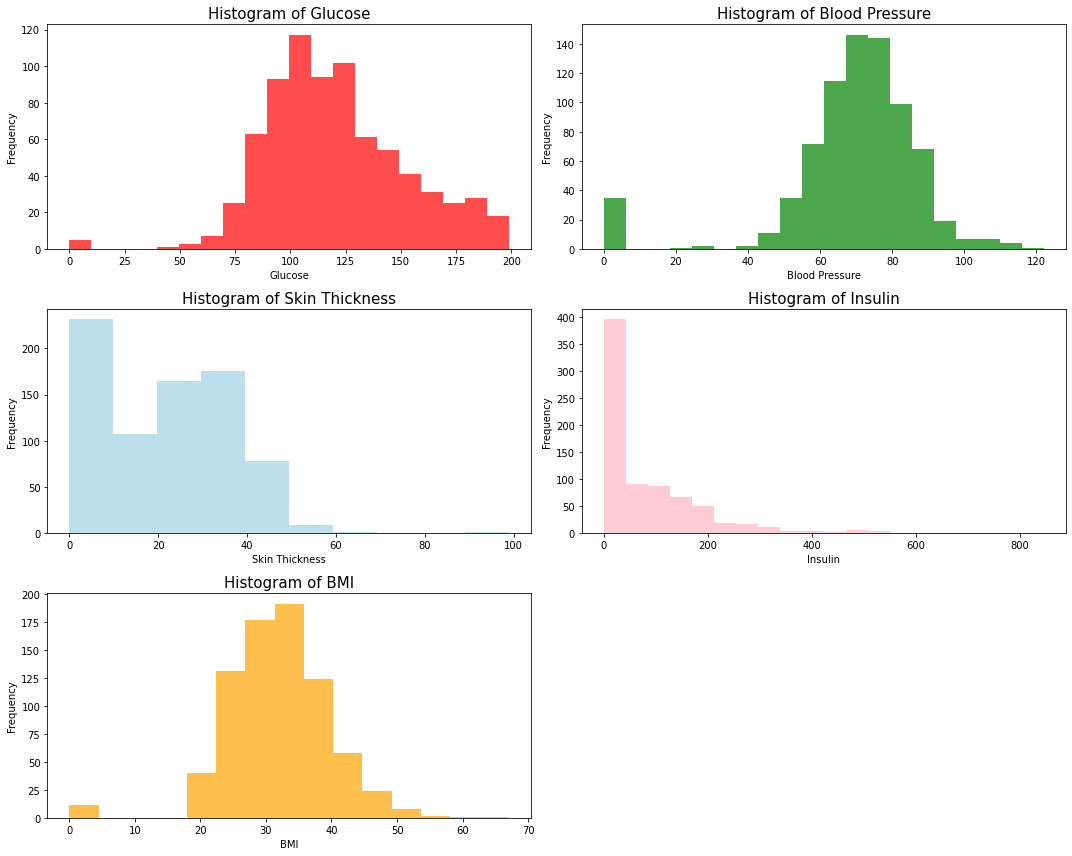

In [8]:
# Exploring the variables using histograms.

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,12))
# Histogram of Glucose
axes[0][0].hist(df['Glucose'], bins=20, alpha=0.7, color='red')
axes[0][0].set_title('Histogram of Glucose', fontsize=15)
axes[0][0].set_xlabel('Glucose')
axes[0][0].set_ylabel('Frequency')

# Histogram of Blood Pressure
axes[0][1].hist(df['BloodPressure'], bins=20, alpha=0.7, color='green')
axes[0][1].set_title('Histogram of Blood Pressure', fontsize=15)
axes[0][1].set_xlabel('Blood Pressure')
axes[0][1].set_ylabel('Frequency')

# Histogram of Skin Thickness
axes[1][0].hist(df['SkinThickness'], bins=10, alpha=0.8, color='lightblue')
axes[1][0].set_title('Histogram of Skin Thickness', fontsize=15)
axes[1][0].set_xlabel('Skin Thickness')
axes[1][0].set_ylabel('Frequency')

# Histogram of Insulin
axes[1][1].hist(df['Insulin'], bins=20, alpha=0.8, color='pink')
axes[1][1].set_title('Histogram of Insulin', fontsize=15)
axes[1][1].set_xlabel('Insulin')
axes[1][1].set_ylabel('Frequency')

# Histogram of BMI
axes[2][0].hist(df['BMI'], bins=15, alpha=0.7, color='orange')
axes[2][0].set_title('Histogram of BMI', fontsize=15)
axes[2][0].set_xlabel('BMI')
axes[2][0].set_ylabel('Frequency')

fig.delaxes(axes[2][1])  # remove the last empty subplot.

plt.tight_layout()
plt.show()

In [9]:
zero_count = (df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]==0).sum()
zero_count

# Observations:
# From the below outcome, you can see counts of 0 values for each variable:
    # Glucose        ---> 5
    # Blood Pressure ---> 35
    # Skin Thickness ---> 227
    # Insulin        ---> 374
    # BMI            ---> 11

# We will replace these zero values with the median of each variable.

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [10]:
# replace 0 with median in specified column.
df['Glucose'].replace(0, df['Glucose'].median(), inplace=True)
df['BloodPressure'].replace(0, df['BloodPressure'].median(), inplace=True)
df['SkinThickness'].replace(0, df['SkinThickness'].median(), inplace=True)
df['Insulin'].replace(0, df['Insulin'].median(), inplace=True)
df['BMI'].replace(0, df['BMI'].median(), inplace=True)

In [11]:
# checking descriptive analysis after handling missing values.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


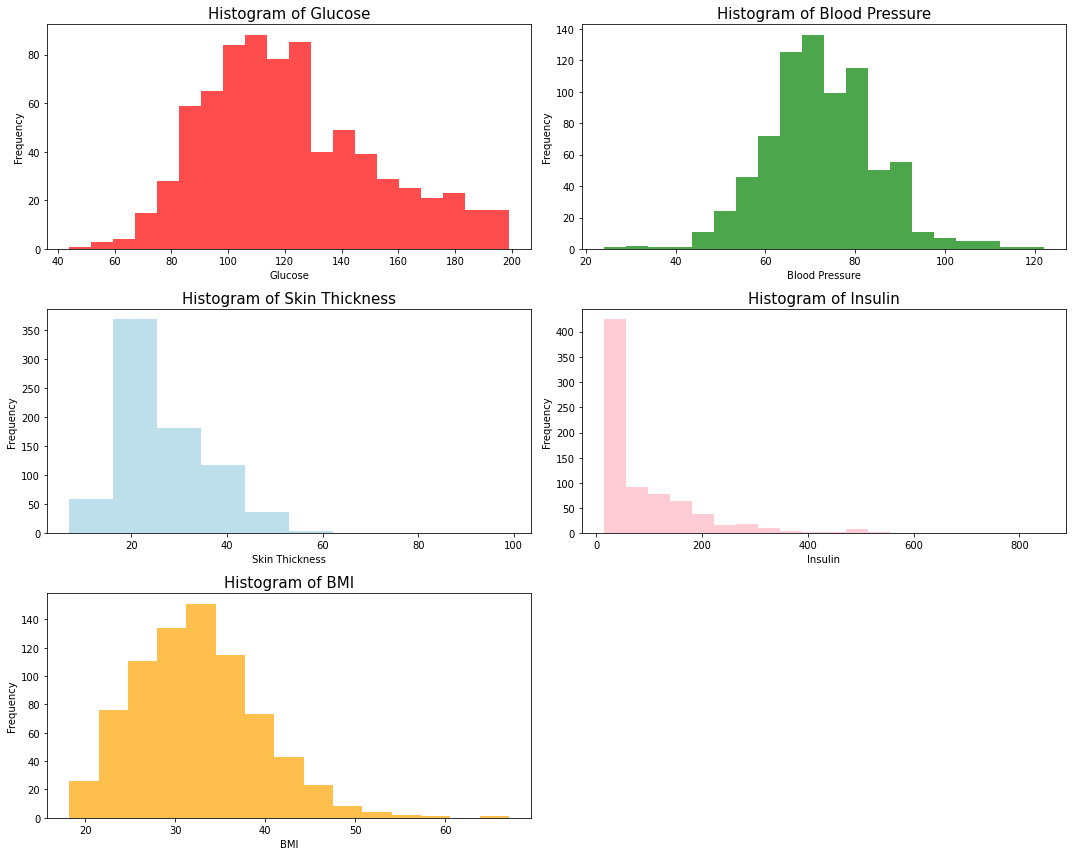

In [12]:
# Exploring data distribution after handling missing values

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,12))
# Histogram of Glucose
axes[0][0].hist(df['Glucose'], bins=20, alpha=0.7, color='red')
axes[0][0].set_title('Histogram of Glucose', fontsize=15)
axes[0][0].set_xlabel('Glucose')
axes[0][0].set_ylabel('Frequency')

# Histogram of Blood Pressure
axes[0][1].hist(df['BloodPressure'], bins=20, alpha=0.7, color='green')
axes[0][1].set_title('Histogram of Blood Pressure', fontsize=15)
axes[0][1].set_xlabel('Blood Pressure')
axes[0][1].set_ylabel('Frequency')

# Histogram of Skin Thickness
axes[1][0].hist(df['SkinThickness'], bins=10, alpha=0.8, color='lightblue')
axes[1][0].set_title('Histogram of Skin Thickness', fontsize=15)
axes[1][0].set_xlabel('Skin Thickness')
axes[1][0].set_ylabel('Frequency')

# Histogram of Insulin
axes[1][1].hist(df['Insulin'], bins=20, alpha=0.8, color='pink')
axes[1][1].set_title('Histogram of Insulin', fontsize=15)
axes[1][1].set_xlabel('Insulin')
axes[1][1].set_ylabel('Frequency')

# Histogram of BMI
axes[2][0].hist(df['BMI'], bins=15, alpha=0.7, color='orange')
axes[2][0].set_title('Histogram of BMI', fontsize=15)
axes[2][0].set_xlabel('BMI')
axes[2][0].set_ylabel('Frequency')

fig.delaxes(axes[2][1])  # remove the last empty subplot.

plt.tight_layout()
plt.show()

                            Dtype
Pregnancies                 int64
Glucose                     int64
BloodPressure               int64
SkinThickness               int64
Insulin                   float64
BMI                       float64
DiabetesPedigreeFunction  float64
Age                         int64
Outcome                     int64


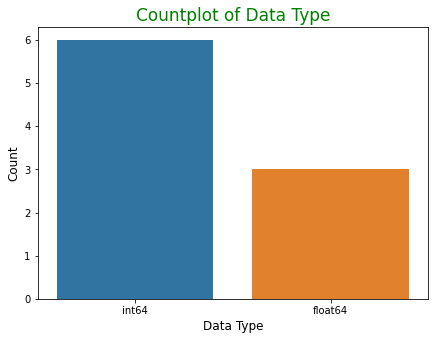

In [13]:
data_type = pd.DataFrame(df.dtypes, columns=['Dtype'])
print(data_type)

# potting the countplot of data_type
plt.figure(figsize=(7,5))
sns.countplot(data=data_type, x='Dtype')
plt.title('Countplot of Data Type', fontsize=17, color='green')
plt.xlabel('Data Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

0    500
1    268
Name: Outcome, dtype: int64


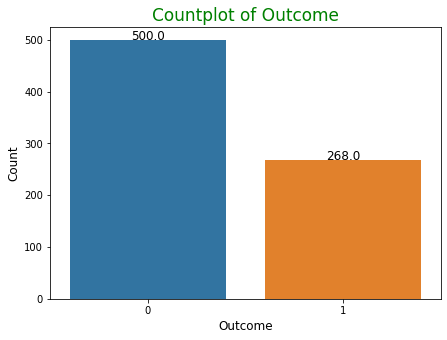

In [14]:
#value count of Outcome.
print(df.Outcome.value_counts())

#visualize the Outcome by plotting Countplot().
plt.figure(figsize=(7,5))
plot = sns.countplot(x = df['Outcome'])
for p in plot.patches:    # Display the count number on the bars
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 4), 
                  textcoords='offset points', fontsize=12)
    
plt.title('Countplot of Outcome', fontsize=17, color='green')
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

The outcome variable in the dataset represents whether an individual has diabetes or not, with values 0 and 1.

##### **<u>Findings<u/>:**
* **Class 0** (indicating individuals without diabetes) has a **count of 500.**
* **Class 1** (indicating individuals with diabetes) has a **count of 268.**

##### **<u>Observations<u/>:**
* The data appears to be imbalanced, as there are more instances of Class 0(non-diabetic) than Class 1(diabetic).
* Imbalanced datasets can pose challenges for machine learning models because they may become biased towards the majority class (class 0 in this case).
    
##### **<u>Future Course of action<u/>:**
**1. Resampling:** You can consider resampling techniques to balance the dataset. There are two main approaches:
   * **Oversampling:** Create additional samples for the minority class (class 1) to balance the class distribution.
   * **Undersampling:** Remove some samples from the majority class (class 0) to balance the class distribution.

**2. Synthetic Data Generation:** Techniques like Synthetic Minority Over-sampling Technique **(SMOTE)** can be used to generate synthetic samples for the minority class.
    
**3. Model Selection:** Choose machine learning algorithms that are less sensitive to class imbalance. Some algorithms can be adjusted with class weights to give more importance to the minority class.
    
**4.** Consider using ensemble methods like Random Forest or Gradient Boosting, which can handle class imbalance better than individual classifiers.
    
**5.** When evaluating the model, avoid accuracy as the primary metric. Instead, use metrics like precision, recall, F1-score, or the area under the Receiver Operating Characteristic (ROC-AUC) curve, which are more informative for imbalanced datasets.

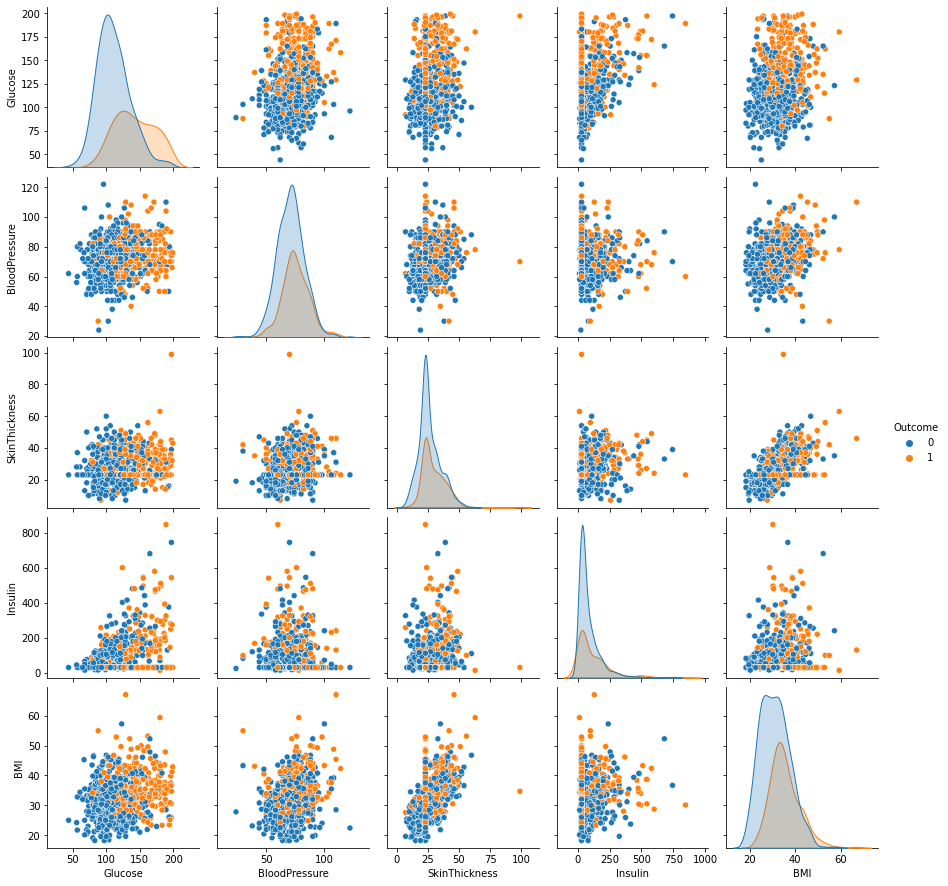

In [15]:
sns.pairplot(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Outcome']], hue='Outcome')
plt.show()

In [16]:
# Correlation

corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


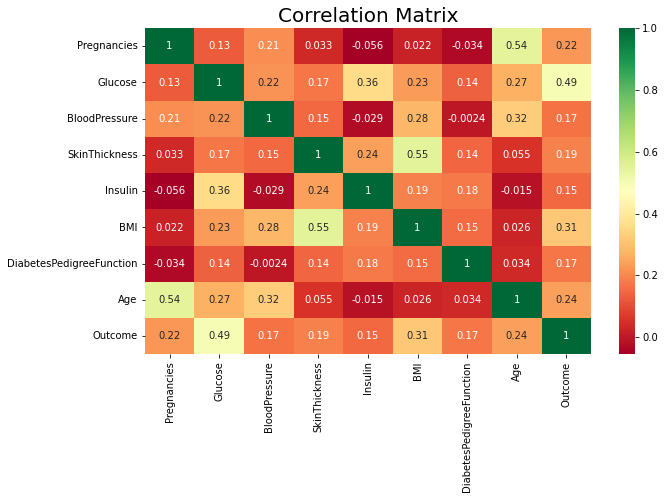

In [17]:
# visulaize the correlation using heatmap.

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix', fontsize=20)
plt.show()

##### Observations:
* There is a positive correlation between the number of Pregnancies and Age (0.54). This is expected, as older individuals are likely to have a higher number of pregnancies.
* Glucose level is positively correlated with Outcome (0.49), indicating that higher glucose levels are associated with a higher likelihood of having diabetes.
* Age is positively correlated with Outcome (0.24), suggesting that older individuals are more likely to have diabetes.

* The Diabetes Pedigree Function has weak correlations with most other features.

* Features like Glucose, BMI, and Age have relatively higher positive correlations with the Outcome, indicating their potential importance in predicting diabetes.


### Task: Week 2

#### <u>Data Modeling<u/>

In [18]:
# Extract the features and target variable from data.

X = df.iloc[:,0:8].values
y = df.iloc[:,-1].values

In [19]:
# As we know target vaiable i.e Outcome is imbalaced.
# So, we will handle the imbalanced data with SMOTE technique using over_sampling.

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)

# resample the data
X_res, y_res = sm.fit_resample(X, y)

#X_res.shape, y_res.shape, y_res.value_counts()

In [20]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=0)

#X_train.shape, y_train.shape, y_train.value_counts()

#### <u>Performing Model Training and checking its performance<u/> 
  ##### We use different algorithm to train the model and its performance and compare with KNN Algorithm.
   * 1. Logistic Regression
   * 2. Random Forest Classifier
   * 3. Gradient Boosting Classifier
   * 4. Support Vector Machine
   * 5. Decision Tree Classifier
   * 6. KNN Classifier

#### 1. **<u>Logistic Regression Algorithm:</u>**

In [21]:
# Using Logistic Regression Algorithm.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr

# predicting the model(lr)
lr_pred = lr.predict(X_test)

# checking accuracy
acc_lr = lr.score(X_test, y_test)
print('Accuracy: {:.2f}'.format(acc_lr*100),'%')

Accuracy: 78.50 %


Confusion Matrix:
 [[78 27]
 [16 79]]


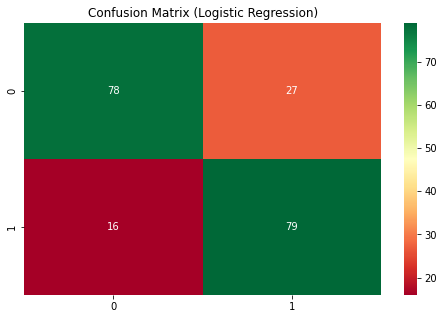

Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78       105
           1       0.75      0.83      0.79        95

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.78       200



In [22]:
from sklearn.metrics import confusion_matrix, classification_report
cm_lr = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:\n', cm_lr)

# plotting heatmap of confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm_lr, annot=True, fmt='g', cmap='RdYlGn')
plt.title('Confusion Matrix (Logistic Regression)', fontsize=12)
plt.show()

print('Classification Report of Logistic Regression:\n', classification_report(y_test, lr_pred))

AUC: 0.818


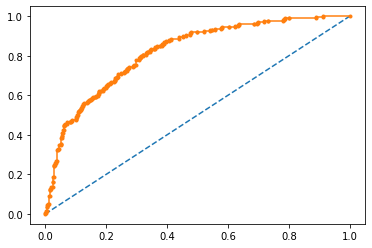

In [23]:
# Preparing ROC (Receiver Operating Characteristic) & AUC score (Area Under the Curve)
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities
prob = lr.predict_proba(X)
# Keep probabilities for the positive outcomes only
prob = prob[:,1]
# Calculate AUC
auc = roc_auc_score(y, prob)
print('AUC: %.3f' % auc)
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y, prob)
# plot no skill
plt.plot([0,1],[0,1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

plt.show()

#### 2. **<u>Random Forest Classifier Algorithm:</u>**

In [24]:
# Using Random Forest Algorithm.
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_depth=10)
rfc.fit(X_train, y_train)
rfc

# predicting the model(rfc)
rfc_pred = rfc.predict(X_test)

# checking accuracy
acc_rfc = rfc.score(X_test, y_test)
print('Accuracy: {:.2f}'.format(acc_rfc*100),'%')

Accuracy: 87.00 %


Confusion Matrix:
 [[86 19]
 [ 7 88]]


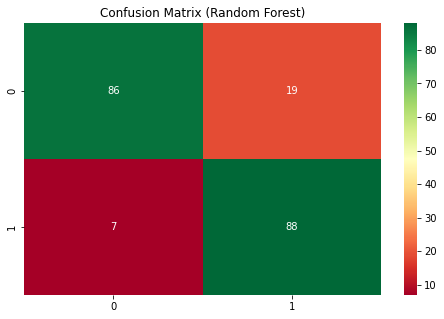

Classification Report of Random Forest:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87       105
           1       0.82      0.93      0.87        95

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200



In [25]:
from sklearn.metrics import confusion_matrix, classification_report
cm_rfc = confusion_matrix(y_test, rfc_pred)
print('Confusion Matrix:\n', cm_rfc)

# plotting heatmap of confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm_rfc, annot=True, fmt='g', cmap='RdYlGn')
plt.title('Confusion Matrix (Random Forest)', fontsize=12)
plt.show()

print('Classification Report of Random Forest:\n', classification_report(y_test, rfc_pred))

#### 3. **<u>Gradient Boosting Classifier Algorithm:</u>**

In [26]:
# Using Gradient Boosting Algorithm.
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, random_state=1)
gbc.fit(X_train, y_train)
gbc

# predicting the model(gbc)
gbc_pred = gbc.predict(X_test)

# checking accuracy
acc_gbc = gbc.score(X_test, y_test)
print('Accuracy: {:.2f}'.format(acc_gbc*100),'%')

Accuracy: 85.00 %


Confusion Matrix:
 [[86 19]
 [11 84]]


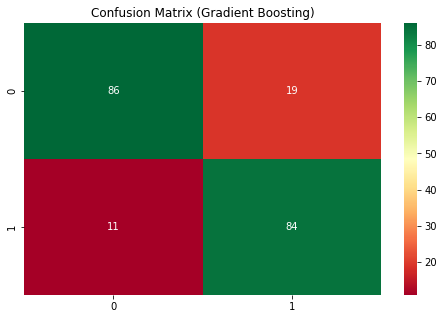

Classification Report of Gradient Boosting:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       105
           1       0.82      0.88      0.85        95

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



In [27]:
from sklearn.metrics import confusion_matrix, classification_report
cm_gbc = confusion_matrix(y_test, gbc_pred)
print('Confusion Matrix:\n', cm_gbc)

# plotting heatmap of confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm_gbc, annot=True, fmt='g', cmap='RdYlGn')
plt.title('Confusion Matrix (Gradient Boosting)', fontsize=12)
plt.show()

print('Classification Report of Gradient Boosting:\n', classification_report(y_test, gbc_pred))

#### 4. **<u>Support Vector Machine Algorithm:</u>**

In [28]:
# Using SVM Algorithm.
from sklearn.svm import SVC
svc = SVC(kernel='rbf', gamma='scale', probability=True)
svc.fit(X_train, y_train)
svc

# predicting the model(svc)
svc_pred = svc.predict(X_test)

# checking accuracy
acc_svc = svc.score(X_test, y_test)
print('Accuracy: {:.2f}'.format(acc_svc*100),'%')

Accuracy: 74.50 %


Confusion Matrix:
 [[77 28]
 [23 72]]


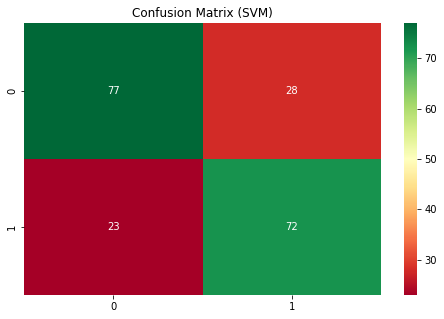

Classification Report of SVM:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75       105
           1       0.72      0.76      0.74        95

    accuracy                           0.74       200
   macro avg       0.74      0.75      0.74       200
weighted avg       0.75      0.74      0.75       200



In [29]:
from sklearn.metrics import confusion_matrix, classification_report
cm_svc = confusion_matrix(y_test, svc_pred)
print('Confusion Matrix:\n', cm_svc)

# plotting heatmap of confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm_svc, annot=True, fmt='g', cmap='RdYlGn')
plt.title('Confusion Matrix (SVM)', fontsize=12)
plt.show()

print('Classification Report of SVM:\n', classification_report(y_test, svc_pred))

AUC: 0.822


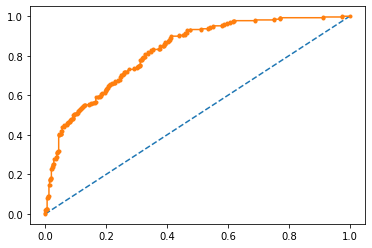

In [30]:
# Preparing ROC (Receiver Operating Characteristic) & AUC score (Area Under the Curve)
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities
svm_prob = svc.predict_proba(X)
# Keep probabilities for the positive outcomes only
svm_prob = svm_prob[:,1]
# Calculate AUC
svm_auc = roc_auc_score(y, svm_prob)
print('AUC: %.3f' % svm_auc)
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y, svm_prob)
# plot no skill
plt.plot([0,1],[0,1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

plt.show()

#### 5. **<u>Decision Tree Classifier Algorithm:</u>**

In [31]:
# Using Gradient Boosting Algorithm.
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=10, criterion='gini', random_state=1)
dtc.fit(X_train, y_train)
dtc

# predicting the model(dtc)
dtc_pred = dtc.predict(X_test)

# checking accuracy
acc_dtc = dtc.score(X_test, y_test)
print('Accuracy: {:.2f}'.format(acc_dtc*100),'%')

Accuracy: 86.50 %


Confusion Matrix:
 [[88 17]
 [10 85]]


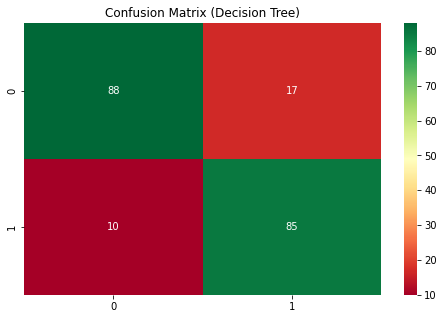

Classification Report of Decision Tree:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       105
           1       0.83      0.89      0.86        95

    accuracy                           0.86       200
   macro avg       0.87      0.87      0.86       200
weighted avg       0.87      0.86      0.87       200



In [32]:
from sklearn.metrics import confusion_matrix, classification_report
cm_dtc = confusion_matrix(y_test, dtc_pred)
print('Confusion Matrix:\n', cm_dtc)

# plotting heatmap of confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm_dtc, annot=True, fmt='g', cmap='RdYlGn')
plt.title('Confusion Matrix (Decision Tree)', fontsize=12)
plt.show()

print('Classification Report of Decision Tree:\n', classification_report(y_test, dtc_pred))

#### 6. **<u>KNearest Neighbor(KNN) Classifier Algorithm:</u>**

In [33]:
# Using KNN Algorithm.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, metric='minkowski')
knn.fit(X_train, y_train)
knn

# predicting the model(KNN)
knn_pred = knn.predict(X_test)

# checking accuracy
acc_knn = knn.score(X_test, y_test)
print('Accuracy: {:.2f}'.format(acc_knn*100),'%')

Accuracy: 78.50 %


Confusion Matrix:
 [[73 32]
 [11 84]]


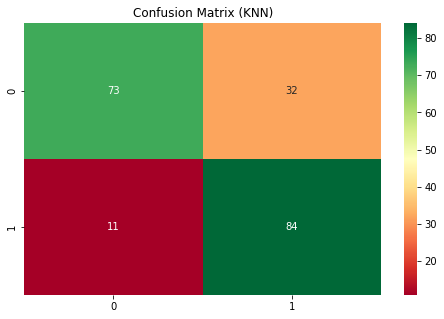

Classification Report of KNN:
               precision    recall  f1-score   support

           0       0.87      0.70      0.77       105
           1       0.72      0.88      0.80        95

    accuracy                           0.79       200
   macro avg       0.80      0.79      0.78       200
weighted avg       0.80      0.79      0.78       200



In [34]:
from sklearn.metrics import confusion_matrix, classification_report
cm_knn = confusion_matrix(y_test, knn_pred)
print('Confusion Matrix:\n', cm_knn)

# plotting heatmap of confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm_knn, annot=True, fmt='g', cmap='RdYlGn')
plt.title('Confusion Matrix (KNN)', fontsize=12)
plt.show()

print('Classification Report of KNN:\n', classification_report(y_test, knn_pred))

In [35]:
# Preparing ROC (Receiver Operating Characteristic) & AUC score (Area Under the Curve)

from sklearn.metrics import roc_curve, roc_auc_score

# predicting the probability of all the model.
prob_Logistic = lr.predict_proba(X)
prob_rfc = rfc.predict_proba(X)
prob_gbc = gbc.predict_proba(X)
prob_svm = svc.predict_proba(X)
prob_dtc = dtc.predict_proba(X)
prob_knn = knn.predict_proba(X)

# Keep probabilities for the positive outcomes only.
# [:,1]---> taking all the rows of positive classes. ROC_curve works only for positive classes.
prob_Logistic = prob_Logistic[:,1]
prob_rfc = prob_rfc[:,1]
prob_gbc = prob_gbc[:,1]
prob_svm = prob_svm[:,1]
prob_dtc = prob_dtc[:,1]
prob_knn = prob_knn[:,1]


In [36]:
# Calculate AUC (Area Under the curve)
auc_logistic = roc_auc_score(y, prob_Logistic)
auc_rfc = roc_auc_score(y, prob_rfc)
auc_gbc = roc_auc_score(y, prob_gbc)
auc_svm = roc_auc_score(y, prob_svm)
auc_dtc = roc_auc_score(y, prob_dtc)
auc_knn = roc_auc_score(y, prob_knn)

#showing & compare AUC_score and Accuracy_Score.
score = pd.DataFrame({'Model': ['Logistic Regression', 'Random forest Classifier', 'Gradient Boosting Classifier', 
                                    'Support Vector Machine', 'Decision Tree Classifier', 'KNearest Neighbor Classifier'],
                         'AUC_Score': [auc_logistic, auc_rfc, auc_gbc, auc_svm, auc_dtc, auc_knn],
                         'Accuracy_Score': [acc_lr, acc_rfc, acc_gbc, acc_svc, acc_dtc, acc_knn]}).sort_values(by='AUC_Score', ascending=False)
score

,Model,AUC_Score,Accuracy_Score
1,Random forest Classifier,0.991030,0.870
4,Decision Tree Classifier,0.967201,0.865
2,Gradient Boosting Classifier,0.929597,0.850
5,KNearest Neighbor Classifier,0.860410,0.785
3,Support Vector Machine,0.822325,0.745
0,Logistic Regression,0.818149,0.785


In [37]:
# Calculate fpr, tpr for ROC Curve
lr_fpr, lr_tpr, lr_threshold = roc_curve(y, prob_Logistic)
rfc_fpr, rfc_tpr, rfc_threshold = roc_curve(y, prob_rfc)
gbc_fpr, gbc_tpr, gbc_threshold = roc_curve(y, prob_gbc)
svm_fpr, svm_tpr, svm_threshold = roc_curve(y, prob_svm)
dtc_fpr, dtc_tpr, dtc_threshold = roc_curve(y, prob_dtc)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y, prob_knn)

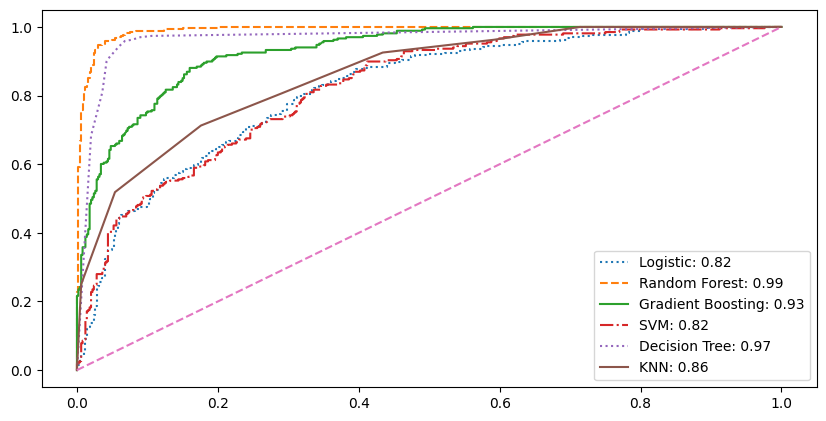

In [38]:
# Plotting ROC Curve for the model
plt.figure(figsize=(10,5), dpi=100)

plt.plot(lr_fpr, lr_tpr, linestyle='dotted', label= ('Logistic: %.2f'% auc_logistic))
plt.plot(rfc_fpr, rfc_tpr, linestyle='--', label= ('Random Forest: %.2f'% auc_rfc))
plt.plot(gbc_fpr, gbc_tpr, linestyle='-', label= ('Gradient Boosting: %.2f'% auc_gbc))
plt.plot(svm_fpr, svm_tpr, linestyle='-.', label= ('SVM: %.2f'% auc_svm))
plt.plot(dtc_fpr, dtc_tpr, linestyle=':', label= ('Decision Tree: %.2f'% auc_dtc))
plt.plot(knn_fpr, knn_tpr, linestyle='-', label= ('KNN: %.2f'% auc_knn))

plt.plot([0,1],[0,1], linestyle='--')
         
plt.legend()
plt.show()

#### <u>Observations<u/>:
* The Random Forest Classifier stands out with the highest AUC score and good accuracy.
* Decision Tree and Gradient Boosting also perform well, following closely behind Random Forest.
* KNearest Neighbor and Logistic Regression show decent performance but are not leading in terms of AUC or accuracy.
* Support Vector Machine(SVM) lags behind the other models in both AUC and accuracy. It might require tuning or feature engineering to improve its performance.

#### <u>Compare all model with KNN(KNearest Neighbor)<u/>:
* Random Forest, Decision Tree, and Gradient Boosting models outperform KNN in terms of AUC and accuracy.
* KNN has lower AUC and accuracy compared to the top-performing models.
* Support Vector Machine and Logistic Regression have lower AUC and accuracy compared to KNN.

Logistic Regression:          f1_score= 0.651; auc= 0.683; avg_precision= 0.685
Random forest Classifier:     f1_score= 0.924; auc= 0.981; avg_precision= 0.981
Gradient Boosting Classifier: f1_score= 0.801; auc= 0.880; avg_precision= 0.880
Support Vector Machine:       f1_score= 0.651; auc= 0.702; avg_precision= 0.703
Decision Tree Classifier:     f1_score= 0.919; auc= 0.949; avg_precision= 0.922
KNearest Neighbor Classifier: f1_score= 0.687; auc= 0.796; avg_precision= 0.750


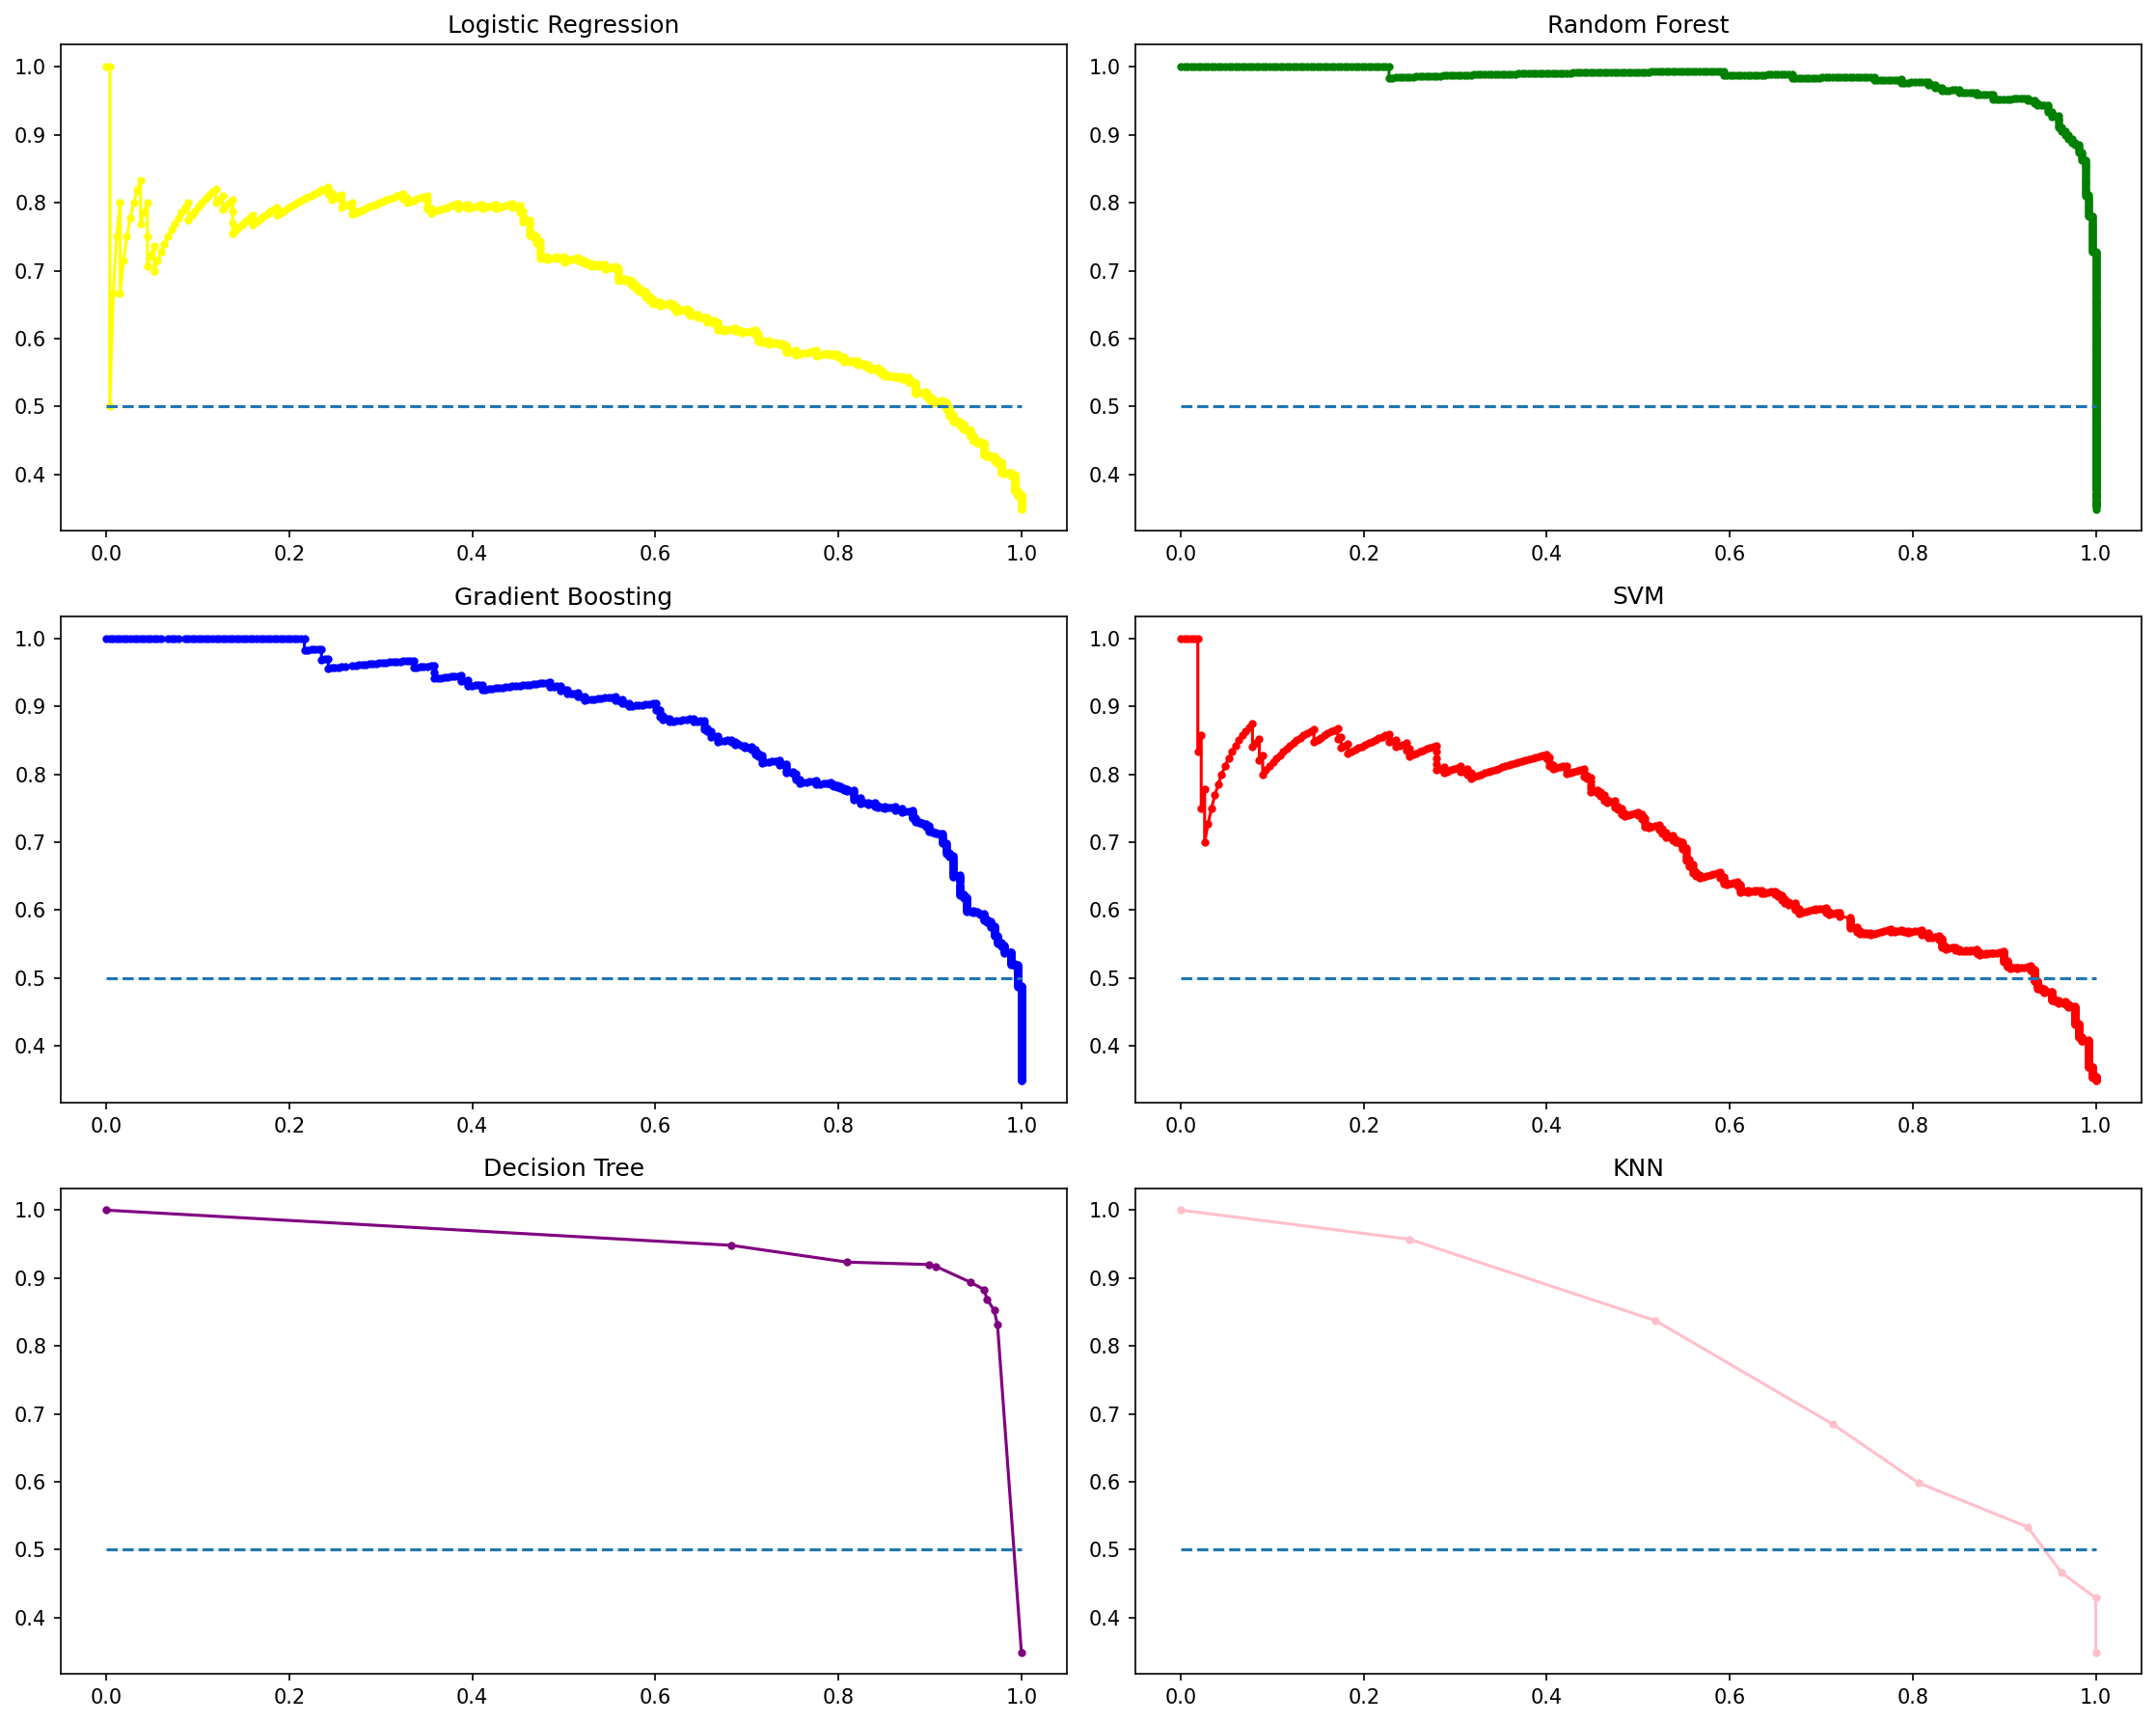

In [39]:
#Precision Recall Curve for all models.

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
prob_Logistic = lr.predict_proba(X)
prob_rfc = rfc.predict_proba(X)
prob_gbc = gbc.predict_proba(X)
prob_svm = svc.predict_proba(X)
prob_dtc = dtc.predict_proba(X)
prob_knn = knn.predict_proba(X)

# keep probabilities for the positive outcome only
prob_Logistic = prob_Logistic[:,1]
prob_rfc = prob_rfc[:,1]
prob_gbc = prob_gbc[:,1]
prob_svm = prob_svm[:,1]
prob_dtc = prob_dtc[:,1]
prob_knn = prob_knn[:,1]

# predict class values
yhat_logistic = lr.predict(X)
yhat_rfc = rfc.predict(X)
yhat_gbc = gbc.predict(X)
yhat_svm = svc.predict(X)
yhat_dtc = dtc.predict(X)
yhat_knn = knn.predict(X)

# calculate precision-recall curve
lr_precision, lr_recall, lr_thresholds = precision_recall_curve(y, prob_Logistic)
rfc_precision, rfc_recall, rfc_thresholds = precision_recall_curve(y, prob_rfc)
gbc_precision, gbc_recall, gbc_thresholds = precision_recall_curve(y, prob_gbc)
svm_precision, svm_recall, svm_thresholds = precision_recall_curve(y, prob_svm)
dtc_precision, dtc_recall, dtc_thresholds = precision_recall_curve(y, prob_dtc)
knn_precision, knn_recall, knn_thresholds = precision_recall_curve(y, prob_knn)

# calculate F1 score
lr_f1 = f1_score(y, yhat_logistic)
rfc_f1 = f1_score(y, yhat_rfc)
gbc_f1 = f1_score(y, yhat_gbc)
svm_f1 = f1_score(y, yhat_svm)
dtc_f1 = f1_score(y, yhat_dtc)
knn_f1 = f1_score(y, yhat_knn)

# calculate precision-recall AUC
lr_auc = auc(lr_recall, lr_precision)
rfc_auc = auc(rfc_recall, rfc_precision)
gbc_auc = auc(gbc_recall, gbc_precision)
svm_auc = auc(svm_recall, svm_precision)
dtc_auc = auc(dtc_recall, dtc_precision)
knn_auc = auc(knn_recall, knn_precision)

# calculate average precision score
lr_avg_precision = average_precision_score(y, prob_Logistic)
rfc_avg_precision = average_precision_score(y, prob_rfc)
gbc_avg_precision = average_precision_score(y, prob_gbc)
svm_avg_precision = average_precision_score(y, prob_svm)
dtc_avg_precision = average_precision_score(y, prob_dtc)
knn_avg_precision = average_precision_score(y, prob_knn)
print('Logistic Regression:          f1_score= %.3f; auc= %.3f; avg_precision= %.3f' % (lr_f1, lr_auc, lr_avg_precision))
print('Random forest Classifier:     f1_score= %.3f; auc= %.3f; avg_precision= %.3f' % (rfc_f1, rfc_auc, rfc_avg_precision))
print('Gradient Boosting Classifier: f1_score= %.3f; auc= %.3f; avg_precision= %.3f' % (gbc_f1, gbc_auc, gbc_avg_precision))
print('Support Vector Machine:       f1_score= %.3f; auc= %.3f; avg_precision= %.3f' % (svm_f1, svm_auc, svm_avg_precision))
print('Decision Tree Classifier:     f1_score= %.3f; auc= %.3f; avg_precision= %.3f' % (dtc_f1, dtc_auc, dtc_avg_precision))
print('KNearest Neighbor Classifier: f1_score= %.3f; auc= %.3f; avg_precision= %.3f' % (knn_f1, knn_auc, knn_avg_precision))


# plot the precision-recall curve for the models
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,12), dpi=150)

axes[0][0].plot(lr_recall, lr_precision, marker='.', color='yellow')
axes[0][0].plot([0,1],[0.5,0.5], linestyle='--')
axes[0][0].set_title('Logistic Regression')

axes[0][1].plot(rfc_recall, rfc_precision, marker='.', color='green')
axes[0][1].plot([0,1],[0.5,0.5], linestyle='--')
axes[0][1].set_title('Random Forest')

axes[1][0].plot(gbc_recall, gbc_precision, marker='.', color='blue')
axes[1][0].plot([0,1],[0.5,0.5], linestyle='--')
axes[1][0].set_title('Gradient Boosting')

axes[1][1].plot(svm_recall, svm_precision, marker='.', color='red')
axes[1][1].plot([0,1],[0.5,0.5], linestyle='--')
axes[1][1].set_title('SVM')

axes[2][0].plot(dtc_recall, dtc_precision, marker='.', color='purple')
axes[2][0].plot([0,1],[0.5,0.5], linestyle='--')
axes[2][0].set_title('Decision Tree')

axes[2][1].plot(knn_recall, knn_precision, marker='.', color='pink')
axes[2][1].plot([0,1],[0.5,0.5], linestyle='--')
axes[2][1].set_title('KNN')

plt.tight_layout()
plt.show()


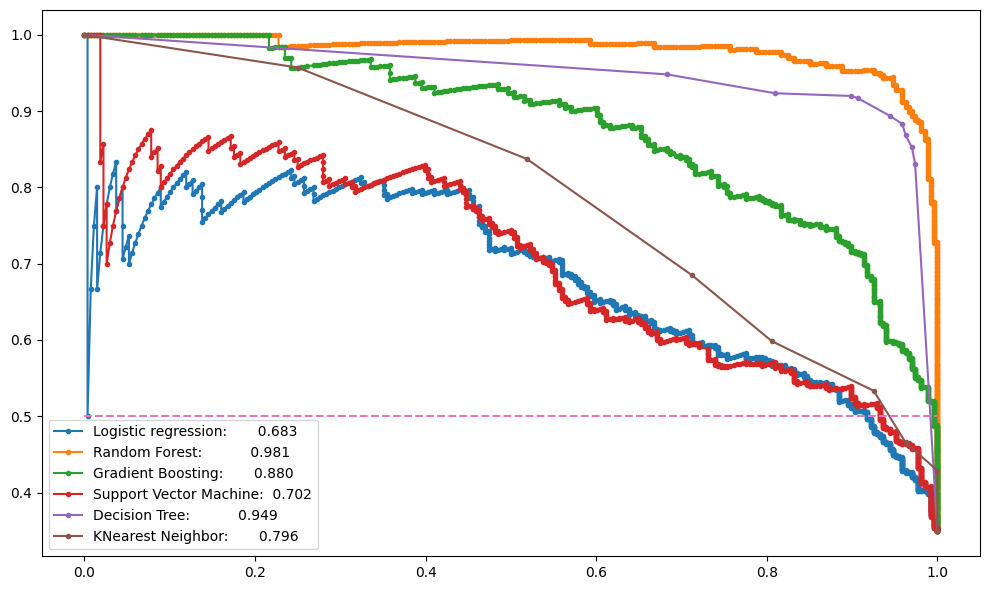

In [40]:
# plotting Precision- recall curve for all model in single Graph
plt.figure(figsize=(10,6), dpi=100)
plt.plot(lr_recall, lr_precision, marker='.', label=('Logistic regression:      % .3f'% lr_auc))
plt.plot(rfc_recall, rfc_precision, marker='.', label=('Random Forest:          % .3f'% rfc_auc))
plt.plot(gbc_recall, gbc_precision, marker='.', label=('Gradient Boosting:      % .3f'% gbc_auc))
plt.plot(svm_recall, svm_precision, marker='.', label=('Support Vector Machine: % .3f'% svm_auc))
plt.plot(dtc_recall, dtc_precision, marker='.', label=('Decision Tree:          % .3f'% dtc_auc))
plt.plot(knn_recall, knn_precision, marker='.', label=('KNearest Neighbor:      % .3f'% knn_auc))

plt.plot([0,1],[0.5,0.5], linestyle='--')

plt.legend()
plt.tight_layout()
plt.show()


#### <u>Observations<u/>:

* Random Forest and Decision Tree models perform excellent with high scores across all metrics.
* Gradient Boosting also performs well but not as high as Random Forest and Decision Tree.
* KNearest Neighbor has moderate performance, and its scores are lower than Random Forest and Decision Tree.
* Logistic Regression and Support Vector Machine show relatively lower performance compared to the ensemble models.

Diabetic Population: 268
Non-Diabetic Population: 500


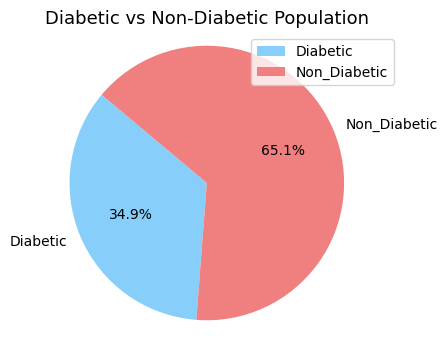

In [41]:
# Pie chart to describe the diabetic and non-diabetic population.

diabetic_count = df['Outcome'].sum()
non_diabetic_count = len(df) - diabetic_count
print('Diabetic Population:', diabetic_count)
print('Non-Diabetic Population:', non_diabetic_count)

labels = ['Diabetic', 'Non_Diabetic']
size = [diabetic_count, non_diabetic_count]
color = ['lightskyblue', 'lightcoral']

plt.figure(figsize=(5,4), dpi=100)
plt.pie(size, labels=labels, colors=color, autopct='%1.1f%%', startangle=140)
plt.title('Diabetic vs Non-Diabetic Population', fontsize=13)
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

### END.